In [1]:
import librosa
import ffmpeg

In [2]:
#!pip install librosa
#!pip install ffmpeg

In [3]:
pwd

'C:\\Users\\jornkric\\OneDrive - Tieto Corporation\\Courses_summer_2020\\Audio-Data-Analysis-Using-Deep-Learning'

In [4]:
audio_data = 'helloworld.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(25402,) 22050


### Plot audio 

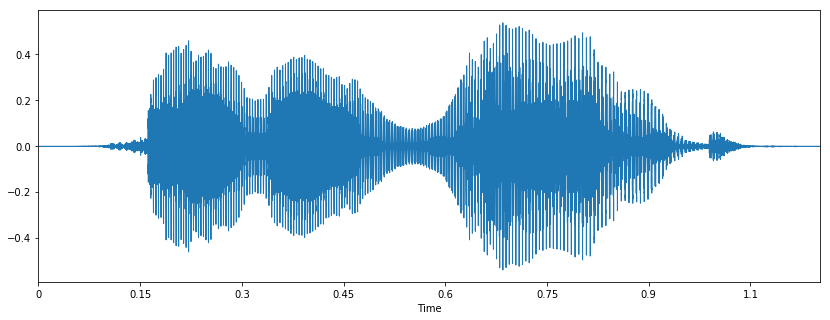

In [5]:
#Visualize an audio file
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [6]:
import IPython.display as ipd
ipd.Audio(audio_data)

### STFT/Fourier Transform 

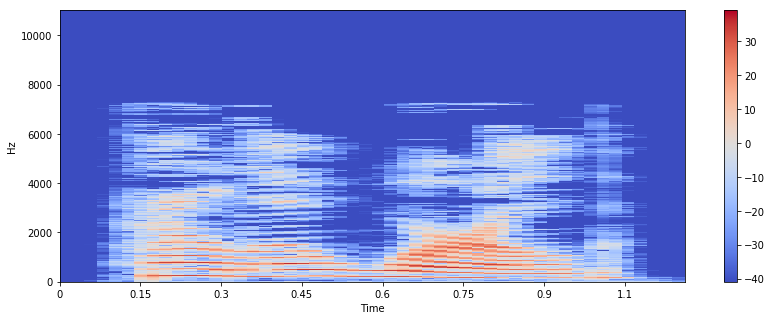

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

C:\Users\jornkric\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\display.py:823: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


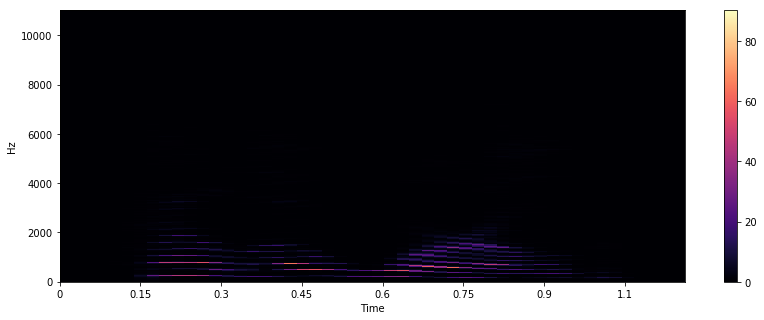

In [8]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(X, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [9]:
X.shape

(1025, 50)

In [10]:
Xdb.shape

(1025, 50)

### Classification model - speech or music? 

In [58]:
# Data from: http://marsyas.info/downloads/datasets.html

In [55]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import pandas as pd
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Create images from wav files
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'music speech'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'music_speech/{g}_wav'):
        songname = f'music_speech/{g}_wav/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        print(y.shape)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)


<Figure size 576x576 with 0 Axes>

In [27]:
# Create header 
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

#### Feature extraction

In [33]:
#We write the data to a csv file
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'music speech'.split()
for g in genres:
    for filename in os.listdir(f'music_speech/{g}_wav'):
        songname = f'music_speech/{g}_wav/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = 0 #librosa.feature.rmse(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())


#### Data + Test/train split

In [42]:
#Analysing the Data in Pandas¶
data = pd.read_csv('dataset.csv')
data.head()
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [43]:
#Encoding the Labels¶
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [44]:
data.head(3)

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.293608,0.0,2849.465676,2327.342587,5250.676583,0.191652,-157.457413,47.406128,-35.376492,16.742680,...,3.491244,2.985722,3.149246,8.074086,3.914154,5.277881,9.263903,2.527690,3.484975,music
1,0.252111,0.0,788.811780,1132.287115,1390.941589,0.039813,-372.412445,183.305008,-13.101943,3.925998,...,-3.294740,-5.666999,-1.581508,-1.335145,-1.788653,0.612836,-0.426194,0.000529,-0.980535,music
2,0.373424,0.0,1612.263803,1588.296941,2910.707399,0.098387,-174.055283,136.072998,-60.397877,4.902534,...,-1.953543,-6.828346,-0.399684,-2.324834,3.906860,1.266850,3.451561,-2.794881,1.336392,music


In [45]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
#Scaling the Feature columns¶
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
#Dividing data into training and Testing set¶
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Fit model 

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
RFC = RandomForestClassifier()

In [51]:
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(RFC.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           1       0.56      0.90      0.69        10

   micro avg       0.69      0.69      0.69        26
   macro avg       0.73      0.73      0.69        26
weighted avg       0.77      0.69      0.69        26



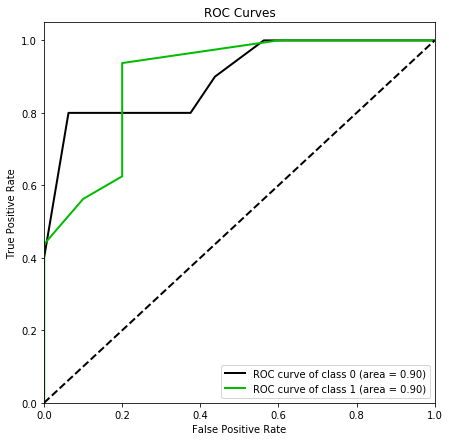

In [52]:
import scikitplot as skplt

y_test_prob = RFC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_test_prob,figsize=(7,7),plot_micro=False,plot_macro=False)
plt.show()